In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('submission.csv')

In [3]:
train_data.columns

Index(['S No.', 'Age', 'Gender', 'Region', 'Weight', 'Height',
       'Body Mass Index', 'Obesity', 'Waist', 'Maximum Blood Pressure',
       'Minimum Blood Pressure', 'Good Cholesterol', 'Bad Cholesterol',
       'Total Cholesterol', 'Unmarried', 'Income', 'Source of Care',
       'PoorVision', 'Alcohol Consumption', 'HyperTension',
       'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis',
       'Family Hepatitis', 'Chronic Fatigue', 'ALF'],
      dtype='object')

In [4]:
train_data.head()

,S No.,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,1,65,M,east,56.0,162.1,21.31,0.0,83.6,135.0,...,0.0,1,0.0,0,0.0,1,1.0,0.0,0.0,0
1,2,36,M,south,60.2,162.2,22.88,0.0,76.6,96.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0
2,3,66,M,east,83.9,162.5,31.77,1.0,113.2,115.0,...,0.0,1,0.0,0,1.0,0,0.0,0.0,0.0,0
3,4,54,M,east,69.4,160.5,26.94,0.0,77.9,110.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0
4,5,63,M,north,73.1,159.2,28.84,0.0,89.3,132.0,...,0.0,0,1.0,0,0.0,0,0.0,0.0,0.0,0


In [5]:
train_data.shape

(6000, 27)

In [6]:
train_data.isnull().sum()

S No.                       0
Age                         0
Gender                      0
Region                      0
Weight                    133
Height                    139
Body Mass Index           206
Obesity                   206
Waist                     215
Maximum Blood Pressure    206
Minimum Blood Pressure    252
Good Cholesterol            8
Bad Cholesterol             8
Total Cholesterol           6
Unmarried                 301
Income                    792
Source of Care              0
PoorVision                376
Alcohol Consumption         0
HyperTension               53
Family  HyperTension        0
Diabetes                    1
Family Diabetes             0
Hepatitis                  13
Family Hepatitis            3
Chronic Fatigue            26
ALF                         0
dtype: int64

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   S No.                   6000 non-null   int64  
 1   Age                     6000 non-null   int64  
 2   Gender                  6000 non-null   object 
 3   Region                  6000 non-null   object 
 4   Weight                  5867 non-null   float64
 5   Height                  5861 non-null   float64
 6   Body Mass Index         5794 non-null   float64
 7   Obesity                 5794 non-null   float64
 8   Waist                   5785 non-null   float64
 9   Maximum Blood Pressure  5794 non-null   float64
 10  Minimum Blood Pressure  5748 non-null   float64
 11  Good Cholesterol        5992 non-null   float64
 12  Bad Cholesterol         5992 non-null   float64
 13  Total Cholesterol       5994 non-null   float64
 14  Unmarried               5699 non-null   

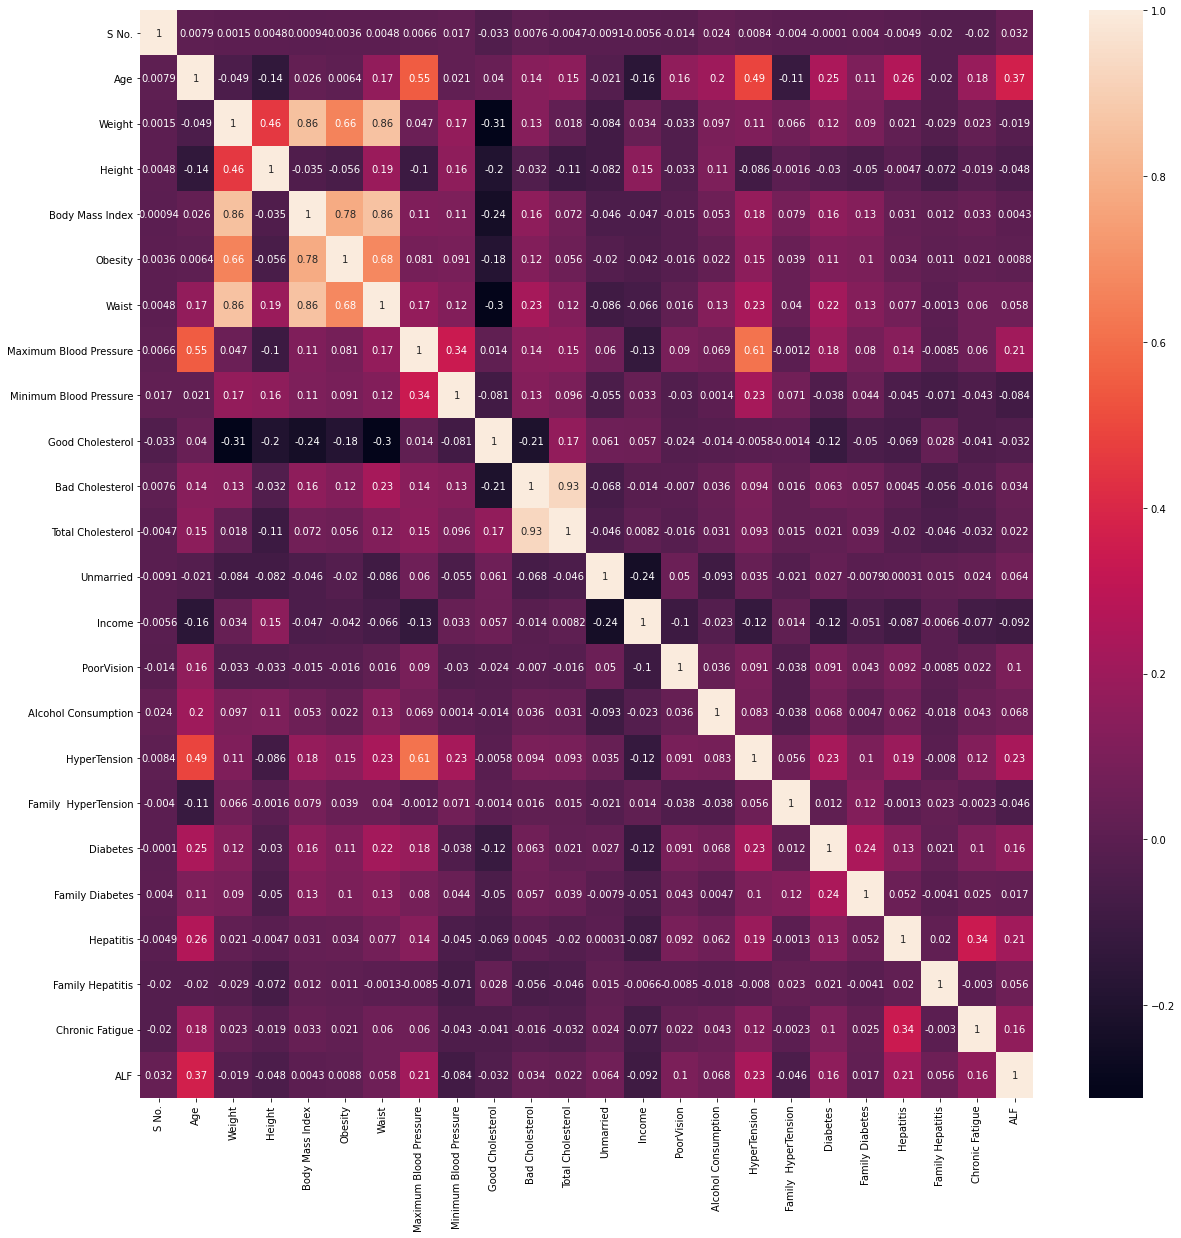

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr(), annot = True)
plt.show()

In [9]:
continuous_columns = ['Age', 'Weight','Height','Body Mass Index', 'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure', 
                   'Good Cholesterol','Bad Cholesterol', 'Total Cholesterol']

In [10]:
for col in continuous_columns:
    train_data[col].fillna(train_data[col].mean(),inplace=True)


In [12]:
train_data.isnull().sum()

S No.                       0
Age                         0
Gender                      0
Region                      0
Weight                      0
Height                      0
Body Mass Index             0
Obesity                   206
Waist                       0
Maximum Blood Pressure      0
Minimum Blood Pressure      0
Good Cholesterol            0
Bad Cholesterol             0
Total Cholesterol           0
Unmarried                 301
Income                    792
Source of Care              0
PoorVision                376
Alcohol Consumption         0
HyperTension               53
Family  HyperTension        0
Diabetes                    1
Family Diabetes             0
Hepatitis                  13
Family Hepatitis            3
Chronic Fatigue            26
ALF                         0
dtype: int64

In [12]:
new_train = pd.get_dummies(data=train_data, columns=[ 'Gender', 'Region', 'Source of Care'])
new_train.columns

Index(['S No.', 'Age', 'Weight', 'Height', 'Body Mass Index', 'Obesity',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Unmarried',
       'Income', 'PoorVision', 'Alcohol Consumption', 'HyperTension',
       'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis',
       'Family Hepatitis', 'Chronic Fatigue', 'ALF', 'Gender_F', 'Gender_M',
       'Region_east', 'Region_north', 'Region_south', 'Region_west',
       'Source of Care_ ', 'Source of Care_Governament Hospital',
       'Source of Care_Never Counsulted', 'Source of Care_Private Hospital',
       'Source of Care_clinic'],
      dtype='object')

In [13]:
new_train.isnull().sum()

S No.                                    0
Age                                      0
Weight                                   0
Height                                   0
Body Mass Index                          0
Obesity                                206
Waist                                    0
Maximum Blood Pressure                   0
Minimum Blood Pressure                   0
Good Cholesterol                         0
Bad Cholesterol                          0
Total Cholesterol                        0
Unmarried                              301
Income                                 792
PoorVision                             376
Alcohol Consumption                      0
HyperTension                            53
Family  HyperTension                     0
Diabetes                                 1
Family Diabetes                          0
Hepatitis                               13
Family Hepatitis                         3
Chronic Fatigue                         26
ALF        

In [41]:
new_train.corr()

,S No.,Age,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,Minimum Blood Pressure,Good Cholesterol,...,Gender_M,Region_east,Region_north,Region_south,Region_west,Source of Care_,Source of Care_Governament Hospital,Source of Care_Never Counsulted,Source of Care_Private Hospital,Source of Care_clinic
S No.,1.000000,0.007915,0.001473,0.004846,0.000944,0.003603,0.004794,0.006574,0.016817,-0.033393,...,-0.009850,0.007583,0.014021,-0.021982,0.004744,0.004523,-0.001996,-0.019037,0.027672,-0.015708
Age,0.007915,1.000000,-0.049331,-0.141202,0.026433,0.006385,0.167213,0.550636,0.020734,0.040277,...,-0.036107,0.137739,-0.046449,-0.089345,-0.059223,-0.022473,-0.011145,-0.249582,0.189931,-0.001675
Weight,0.001473,-0.049331,1.000000,0.455965,0.855866,0.661514,0.861367,0.047333,0.171405,-0.311456,...,-0.262918,0.033698,0.120708,-0.120161,-0.048539,0.019418,0.010390,-0.043904,0.044708,-0.021807
Height,0.004846,-0.141202,0.455965,1.000000,-0.035120,-0.056179,0.191240,-0.102094,0.156086,-0.195414,...,-0.658471,0.194047,0.097974,-0.275207,-0.053541,0.012716,0.044026,0.066388,-0.014638,-0.065878
Body Mass Index,0.000944,0.026433,0.855866,-0.035120,1.000000,0.780720,0.858931,0.113654,0.106563,-0.239383,...,0.066514,-0.073707,0.086162,0.020118,-0.030741,0.011337,-0.014981,-0.085170,0.054080,0.017719
Obesity,0.003603,0.006385,0.661514,-0.056179,0.780720,1.000000,0.677246,0.080932,0.091398,-0.181760,...,0.093939,-0.057327,0.070554,0.013213,-0.025592,0.007562,0.004540,-0.083928,0.035341,0.029190
Waist,0.004794,0.167213,0.861367,0.191240,0.858931,0.677246,1.000000,0.173512,0.122510,-0.304435,...,-0.147816,0.014673,0.017381,-0.017831,-0.033655,0.014436,0.003526,-0.104820,0.061184,0.016158
Maximum Blood Pressure,0.006574,0.550636,0.047333,-0.102094,0.113654,0.080932,0.173512,1.000000,0.342212,0.014392,...,-0.039389,-0.019287,0.059529,-0.021204,-0.020330,0.016243,0.006750,-0.116520,0.091516,-0.012011
Minimum Blood Pressure,0.016817,0.020734,0.171405,0.156086,0.106563,0.091398,0.122510,0.342212,1.000000,-0.081371,...,-0.157870,-0.035077,0.066510,-0.033301,0.040891,0.026899,0.015881,-0.012287,0.001919,-0.001421
Good Cholesterol,-0.033393,0.040277,-0.311456,-0.195414,-0.239383,-0.181760,-0.304435,0.014392,-0.081371,1.000000,...,0.321731,0.023052,0.081064,-0.093509,-0.000497,-0.014806,0.017903,-0.048316,0.048741,-0.025396


In [14]:
new_train.drop('Income',axis=1,inplace=True)

In [37]:
new_train = new_train[['S No.', 'Age', 'Weight', 'Height', 'Body Mass Index', 'Obesity',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Unmarried',
        'PoorVision', 'Alcohol Consumption', 'HyperTension',
       'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis',
       'Family Hepatitis', 'Chronic Fatigue', 'Gender_F', 'Gender_M',
       'Region_east', 'Region_north', 'Region_south', 'Region_west',
       'Source of Care_ ', 'Source of Care_Governament Hospital',
       'Source of Care_Never Counsulted', 'Source of Care_Private Hospital',
       'Source of Care_clinic',  'ALF']]

In [38]:
new_train.columns

Index(['S No.', 'Age', 'Weight', 'Height', 'Body Mass Index', 'Obesity',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Unmarried',
       'PoorVision', 'Alcohol Consumption', 'HyperTension',
       'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis',
       'Family Hepatitis', 'Chronic Fatigue', 'Gender_F', 'Gender_M',
       'Region_east', 'Region_north', 'Region_south', 'Region_west',
       'Source of Care_ ', 'Source of Care_Governament Hospital',
       'Source of Care_Never Counsulted', 'Source of Care_Private Hospital',
       'Source of Care_clinic', 'ALF'],
      dtype='object')

In [15]:
new_train.dropna(inplace = True)

In [16]:
new_train.shape

(5134, 34)

Index(['S No.', 'Age', 'Weight', 'Height', 'Body Mass Index', 'Obesity',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Unmarried',
       'PoorVision', 'Alcohol Consumption', 'HyperTension',
       'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis',
       'Family Hepatitis', 'Chronic Fatigue', 'ALF', 'Gender_F', 'Gender_M',
       'Region_east', 'Region_north', 'Region_south', 'Region_west',
       'Source of Care_ ', 'Source of Care_Governament Hospital',
       'Source of Care_Never Counsulted', 'Source of Care_Private Hospital',
       'Source of Care_clinic'],
      dtype='object')

In [18]:
# testing dataset preprocessing

In [19]:
test_data.head()

,S No.,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,...,Source of Care,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue
0,6001,69,M,east,73.5,157.7,29.55,0.0,91.0,128.0,...,Private Hospital,0.0,0,1.0,0,0.0,1,0.0,0.0,0.0
1,6002,40,F,east,68.3,180.6,20.94,0.0,89.3,131.0,...,Private Hospital,0.0,0,0.0,1,0.0,1,0.0,0.0,0.0
2,6003,76,F,east,NaN,NaN,NaN,NaN,NaN,133.0,...,Private Hospital,NaN,1,0.0,0,0.0,0,0.0,0.0,0.0
3,6004,70,M,north,68.4,154.8,28.54,0.0,98.3,129.0,...,clinic,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0
4,6005,24,M,south,65.5,154.2,27.55,0.0,83.5,107.0,...,Private Hospital,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0


In [20]:
test_data.shape

(2785, 26)

In [21]:
submission_data.head()

,S No.,ALF
0,6001,0
1,6002,0
2,6003,0
3,6004,0
4,6005,0


In [22]:
submission_data.shape

(2785, 2)

In [23]:
new_test_data = pd.merge(test_data,submission_data, on='S No.')

In [24]:
new_test_data.shape

(2785, 27)

In [25]:
new_test_data.head()

,S No.,Age,Gender,Region,Weight,Height,Body Mass Index,Obesity,Waist,Maximum Blood Pressure,...,PoorVision,Alcohol Consumption,HyperTension,Family HyperTension,Diabetes,Family Diabetes,Hepatitis,Family Hepatitis,Chronic Fatigue,ALF
0,6001,69,M,east,73.5,157.7,29.55,0.0,91.0,128.0,...,0.0,0,1.0,0,0.0,1,0.0,0.0,0.0,0
1,6002,40,F,east,68.3,180.6,20.94,0.0,89.3,131.0,...,0.0,0,0.0,1,0.0,1,0.0,0.0,0.0,0
2,6003,76,F,east,NaN,NaN,NaN,NaN,NaN,133.0,...,NaN,1,0.0,0,0.0,0,0.0,0.0,0.0,0
3,6004,70,M,north,68.4,154.8,28.54,0.0,98.3,129.0,...,0.0,1,0.0,0,0.0,0,0.0,0.0,0.0,0
4,6005,24,M,south,65.5,154.2,27.55,0.0,83.5,107.0,...,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0


In [26]:
new_test_data.columns

Index(['S No.', 'Age', 'Gender', 'Region', 'Weight', 'Height',
       'Body Mass Index', 'Obesity', 'Waist', 'Maximum Blood Pressure',
       'Minimum Blood Pressure', 'Good Cholesterol', 'Bad Cholesterol',
       'Total Cholesterol', 'Unmarried', 'Income', 'Source of Care',
       'PoorVision', 'Alcohol Consumption', 'HyperTension',
       'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis',
       'Family Hepatitis', 'Chronic Fatigue', 'ALF'],
      dtype='object')

In [27]:
new_test_data.isnull().sum()

S No.                       0
Age                         0
Gender                      0
Region                      0
Weight                     61
Height                     52
Body Mass Index            84
Obesity                    84
Waist                      99
Maximum Blood Pressure     98
Minimum Blood Pressure    124
Good Cholesterol            9
Bad Cholesterol            10
Total Cholesterol          10
Unmarried                 151
Income                    369
Source of Care              0
PoorVision                187
Alcohol Consumption         0
HyperTension               27
Family  HyperTension        0
Diabetes                    1
Family Diabetes             0
Hepatitis                   9
Family Hepatitis            3
Chronic Fatigue             9
ALF                         0
dtype: int64

In [28]:
for col in continuous_columns:
    new_test_data[col].fillna(new_test_data[col].mean(),inplace=True)

In [29]:
new_test_data.isnull().sum()

S No.                       0
Age                         0
Gender                      0
Region                      0
Weight                      0
Height                      0
Body Mass Index             0
Obesity                    84
Waist                       0
Maximum Blood Pressure      0
Minimum Blood Pressure      0
Good Cholesterol            0
Bad Cholesterol             0
Total Cholesterol           0
Unmarried                 151
Income                    369
Source of Care              0
PoorVision                187
Alcohol Consumption         0
HyperTension               27
Family  HyperTension        0
Diabetes                    1
Family Diabetes             0
Hepatitis                   9
Family Hepatitis            3
Chronic Fatigue             9
ALF                         0
dtype: int64

In [30]:
new_test_data1 = pd.get_dummies(data=new_test_data, columns=[ 'Gender', 'Region', 'Source of Care'])
new_test_data1.columns

Index(['S No.', 'Age', 'Weight', 'Height', 'Body Mass Index', 'Obesity',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Unmarried',
       'Income', 'PoorVision', 'Alcohol Consumption', 'HyperTension',
       'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis',
       'Family Hepatitis', 'Chronic Fatigue', 'ALF', 'Gender_F', 'Gender_M',
       'Region_east', 'Region_north', 'Region_south', 'Region_west',
       'Source of Care_ ', 'Source of Care_Governament Hospital',
       'Source of Care_Never Counsulted', 'Source of Care_Private Hospital',
       'Source of Care_clinic'],
      dtype='object')

In [31]:
new_test_data1.drop('Income',axis=1,inplace=True)

In [39]:
new_test_data1 = new_test_data1[['S No.', 'Age', 'Weight', 'Height', 'Body Mass Index', 'Obesity',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Unmarried',
        'PoorVision', 'Alcohol Consumption', 'HyperTension',
       'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis',
       'Family Hepatitis', 'Chronic Fatigue', 'Gender_F', 'Gender_M',
       'Region_east', 'Region_north', 'Region_south', 'Region_west',
       'Source of Care_ ', 'Source of Care_Governament Hospital',
       'Source of Care_Never Counsulted', 'Source of Care_Private Hospital',
       'Source of Care_clinic',  'ALF']]

In [32]:
new_test_data1.dropna(inplace=True)

In [33]:
new_test_data1.shape

(2366, 34)

In [34]:
new_test_data1.columns

Index(['S No.', 'Age', 'Weight', 'Height', 'Body Mass Index', 'Obesity',
       'Waist', 'Maximum Blood Pressure', 'Minimum Blood Pressure',
       'Good Cholesterol', 'Bad Cholesterol', 'Total Cholesterol', 'Unmarried',
       'PoorVision', 'Alcohol Consumption', 'HyperTension',
       'Family  HyperTension', 'Diabetes', 'Family Diabetes', 'Hepatitis',
       'Family Hepatitis', 'Chronic Fatigue', 'ALF', 'Gender_F', 'Gender_M',
       'Region_east', 'Region_north', 'Region_south', 'Region_west',
       'Source of Care_ ', 'Source of Care_Governament Hospital',
       'Source of Care_Never Counsulted', 'Source of Care_Private Hospital',
       'Source of Care_clinic'],
      dtype='object')

In [47]:
x_train = new_train.iloc[:,1:32]
y_train = new_train.iloc[:,33]
x_test = new_test_data1.iloc[:,1:32]
y_test = new_test_data1.iloc[:,33]

In [48]:
x_train.shape, y_train.shape, x_test.shape,y_test.shape

((5134, 31), (5134,), (2366, 31), (2366,))

In [49]:
from sklearn.linear_model import LogisticRegression

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [65]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, accuracy_score, r2_score, f1_score, confusion_matrix

In [62]:
lr=LogisticRegression()  #creating object for the model
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

print("---- logestic Regression - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_lr)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_lr)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_lr))))
print("F1 Score : {}".format(f1_score(y_test, y_pred_lr)))
print("accuracy Score : {}".format(accuracy_score(y_test, y_pred_lr)))

---- logestic Regression - Model Evaluation ----
Mean Absolute Error (MAE): 0.02028740490278952
Mean Squared Error (MSE): 0.02028740490278952
Root Mean Squared Error (RMSE): 0.14243386150346946
F1 Score : 0.0
accuracy Score : 0.9797125950972105


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', '

In [66]:
from sklearn.svm import SVC
svc=SVC()  #creating object for the model
svc.fit(x_train,y_train)
y_pred_svc = svc.predict(x_test)

print("----  SVC - Model Evaluation ----")
print("Mean Absolute Error (MAE): {}".format(mae(y_test, y_pred_svc)))
print("Mean Squared Error (MSE): {}".format(mse(y_test, y_pred_svc)))
print("Root Mean Squared Error (RMSE): {}".format(np.sqrt(mse(y_test, y_pred_svc))))
print("F1 Score : {}".format(f1_score(y_test, y_pred_svc)))
print("accuracy Score : {}".format(accuracy_score(y_test, y_pred_svc)))


confusion_matrix(y_test, y_pred_svc)

C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


----  SVC - Model Evaluation ----
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
F1 Score : 0.0
accuracy Score : 1.0


C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Asus\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


array([[2366]], dtype=int64)